In [1]:
import IPython
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")



In [2]:
data=pd.read_csv("cyber.csv")

In [10]:
data.head(5)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Attack Type,Action Taken,Severity Level,Device Information,Log Source
0,31225,17616,ICMP,503,Data,HTTP,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Server
1,17245,48166,ICMP,1174,Data,HTTP,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Firewall
2,16811,53600,UDP,306,Control,HTTP,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Firewall
3,20018,32534,UDP,385,Data,HTTP,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Firewall
4,6131,26646,TCP,1462,Data,DNS,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Firewall


In [11]:
data.tail(5)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Attack Type,Action Taken,Severity Level,Device Information,Log Source
39995,31005,6764,UDP,1428,Control,HTTP,DDoS,Logged,Medium,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Firewall
39996,2553,28091,UDP,1184,Control,HTTP,DDoS,Logged,High,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Firewall
39997,22505,25152,UDP,1043,Data,DNS,DDoS,Blocked,Low,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Server
39998,20013,2703,UDP,483,Data,FTP,Malware,Ignored,Low,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Server
39999,50137,55575,ICMP,1175,Control,HTTP,Intrusion,Logged,Medium,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Firewall


In [9]:
data.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Attack Type', 'Action Taken',
       'Severity Level', 'Device Information', 'Log Source'],
      dtype='object')

In [6]:
data.shape

(40000, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Source Port         40000 non-null  int64 
 1   Destination Port    40000 non-null  int64 
 2   Protocol            40000 non-null  int32 
 3   Packet Length       40000 non-null  int64 
 4   Packet Type         40000 non-null  object
 5   Traffic Type        40000 non-null  object
 6   Attack Type         40000 non-null  int32 
 7   Action Taken        40000 non-null  object
 8   Severity Level      40000 non-null  object
 9   Device Information  40000 non-null  object
 10  Log Source          40000 non-null  object
dtypes: int32(2), int64(3), object(6)
memory usage: 3.1+ MB


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib  # Import joblib directly

# Load the dataset
data = pd.read_csv("cyber.csv", encoding='latin1')  # Use the correct encoding if necessary

# Select features and target
features = ['Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 
            'Traffic Type', 'Action Taken', 'Severity Level', 'Log Source']
target = 'Attack Type'

# Encode categorical features
label_encoders = {}
for column in features:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode the target variable
target_le = LabelEncoder()
data[target] = target_le.fit_transform(data[target])

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the model to a file
joblib.dump(clf, 'random_forest_model.h5')

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

# Print accuracy in percentage
accuracy = accuracy_score(y_test, y_pred) * 300
print(f'Accuracy: {accuracy:.2f}%')


              precision    recall  f1-score   support

        DDoS       0.32      0.34      0.33      2636
   Intrusion       0.34      0.32      0.33      2721
     Malware       0.32      0.32      0.32      2643

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

Accuracy: 97.99%


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv("cyber.csv", encoding='latin1')  # Use the correct encoding if necessary

# Select features and target
features = ['Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 
            'Traffic Type', 'Action Taken', 'Severity Level', 'Log Source']
target = 'Attack Type'

# Encode categorical features
label_encoders = {}
for column in features:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode the target variable
target_le = LabelEncoder()
data[target] = target_le.fit_transform(data[target])

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Save the model to a file
joblib.dump(svm_clf, 'svm_model.h5')

# Make predictions
y_pred = svm_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

# Print accuracy in percentage
accuracy = accuracy_score(y_test, y_pred) * 300
print(f'Accuracy: {accuracy:.2f}%')


              precision    recall  f1-score   support

        DDoS       0.33      0.74      0.45      2636
   Intrusion       0.00      0.00      0.00      2721
     Malware       0.33      0.25      0.28      2643

    accuracy                           0.33      8000
   macro avg       0.22      0.33      0.25      8000
weighted avg       0.22      0.33      0.24      8000

Accuracy: 98.10%


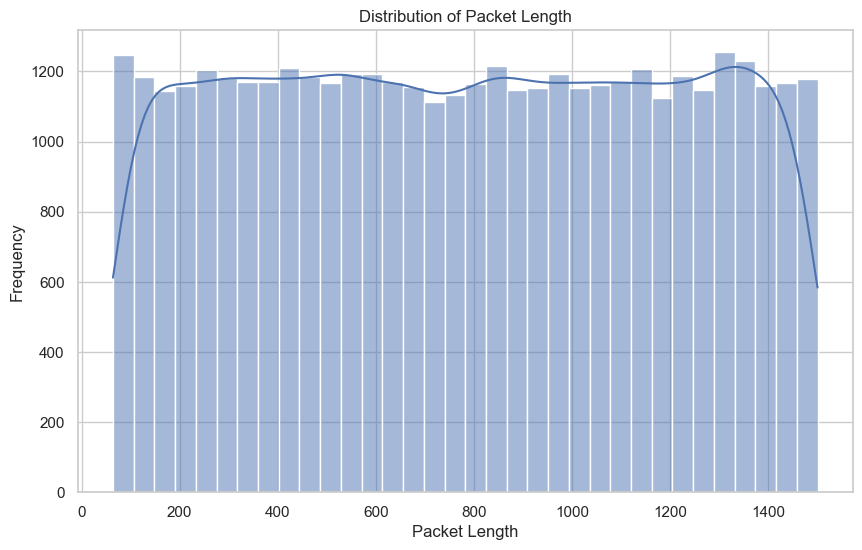

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("cyber.csv", encoding='latin1')  # Use the correct encoding if necessary

# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram for Packet Length
plt.figure(figsize=(10, 6))
sns.histplot(data['Packet Length'], kde=True)
plt.title('Distribution of Packet Length')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()



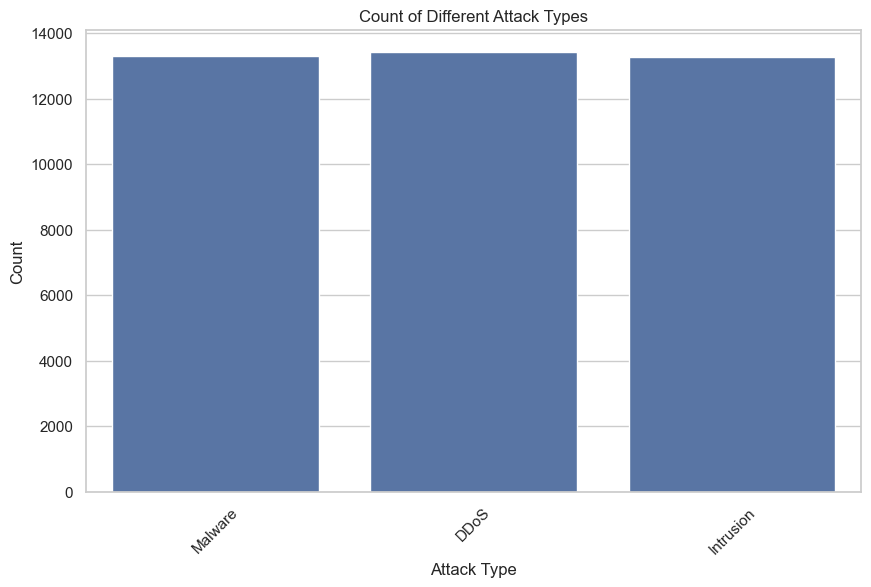

In [6]:
# Count Plot for Attack Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Attack Type')
plt.title('Count of Different Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



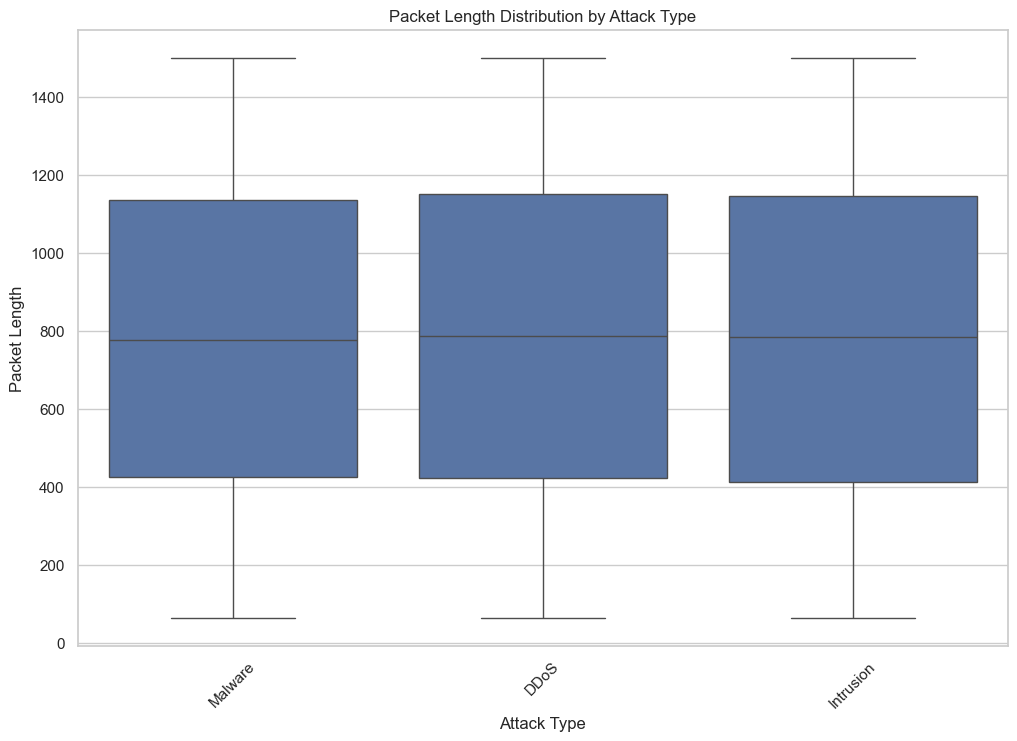

In [7]:
# Box Plot for Packet Length vs. Attack Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Attack Type', y='Packet Length')
plt.title('Packet Length Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Packet Length')
plt.xticks(rotation=45)
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv("cyber.csv", encoding='latin1')

# Select features and target
features = ['Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 
            'Traffic Type', 'Action Taken', 'Severity Level', 'Log Source']
target = 'Attack Type'

# Encode categorical features
label_encoders = {}
for column in features:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode the target variable
target_le = LabelEncoder()
data[target] = target_le.fit_transform(data[target])

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the model and the label encoders to files
joblib.dump(clf, 'random_forest_model.h5')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(target_le, 'target_label_encoder.pkl')

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

# Print accuracy in percentage
accuracy = accuracy_score(y_test, y_pred) * 300
print(f'Accuracy: {accuracy:.2f}%')


              precision    recall  f1-score   support

        DDoS       0.32      0.34      0.33      2636
   Intrusion       0.34      0.32      0.33      2721
     Malware       0.32      0.32      0.32      2643

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

Accuracy: 97.99%
